In [1]:
run model.py

In [9]:

device = "cpu"
#評価対象のモデルをインスタンス化する
model_z_2 = VAE(2)
model_z_10 = VAE(10)
model_z_20 = VAE(20)
model_z_2.load_state_dict(torch.load("./z_2.pth"))
model_z_10.load_state_dict(torch.load("./z_10.pth"))
model_z_20.load_state_dict(torch.load("./z_20.pth"))
# forループを回すためにモデルをリスト化する
model_list = [model_z_2.eval(), model_z_10.eval(), model_z_20.eval()]
# 可視化開始
for num_batch, data in enumerate(dataloader_test):
    fig, axes = plt.subplots(4, 10, figsize=(20, 4))
    for i in range(axes.shape[0]):
        for j in range(axes.shape[1]): 
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
    # まずは入力画像を描画
    for i, im in enumerate(data[0].view(-1, 28, 28)[:10]):
        axes[0][i].imshow(im, "gray")
    # z_dim=2, z_dim=10, z_dim=20の3つの学習済みVAEについて再構成画像を描画
    for i, model in enumerate(model_list):
        _, _, y = model(data[0], device)
        y = y.cpu().detach().numpy().reshape(-1, 28, 28)
        for j, im in enumerate(y[:10]):
            axes[i+1][j].imshow(im, "gray")
    fig.savefig(f"./reconstruction_{num_batch}.png")
    plt.close(fig)

In [ ]:
# 評価対象のモデルをインスタンス化する
model_z_2 = VAE(2)
model_z_10 = VAE(10)
model_z_20 = VAE(20)
model_z_2.load_state_dict(torch.load("./z_2.pth"))
model_z_10.load_state_dict(torch.load("./z_10.pth"))
model_z_20.load_state_dict(torch.load("./z_20.pth"))
# forループを回すためにモデルをリスト化する
model_list = [model_z_2.eval(), model_z_10.eval(), model_z_20.eval()]
# 可視化開始
for num_batch, data in enumerate(dataloader_test):
    fig, axes = plt.subplots(4, 10, figsize=(20, 4))
    for i in range(axes.shape[0]):
        for j in range(axes.shape[1]): 
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
    # まずは入力画像を描画
    for i, im in enumerate(data[0].view(-1, 28, 28)[:10]):
        axes[0][i].imshow(im, "gray")
    # z_dim=2, z_dim=10, z_dim=20の3つの学習済みVAEについて再構成画像を描画
    for i, model in enumerate(model_list):
        _, _, y = model(data[0], device)
        y = y.cpu().detach().numpy().reshape(-1, 28, 28)
        for j, im in enumerate(y[:10]):
            axes[i+1][j].imshow(im, "gray")
    fig.savefig(f"./reconstruction_{num_batch}.png")
    plt.close(fig)

In [12]:
z_dim = 2
model = VAE(z_dim)
cm = plt.get_cmap("tab10") # カラーマップの用意
# 可視化開始
for num_batch, data in enumerate(dataloader_test):
    fig_plot, ax_plot = plt.subplots(figsize=(9, 9))
    fig_scatter, ax_scatter = plt.subplots(figsize=(9, 9))
    # 学習済みVAEに入力を与えたときの潜在変数を抽出
    _, z, _ = model(data[0], device)
    z = z.detach().numpy()
    # 各クラスごとに可視化する
    for k in range(10):
        cluster_indexes = np.where(data[1].detach().numpy() == k)[0]
        ax_plot.plot(z[cluster_indexes,0], z[cluster_indexes,1], "o", ms=4, color=cm(k))
    fig_plot.savefig(f"./latent_space_z_{z_dim}_{num_batch}_plot.png")
    fig_scatter.savefig(f"./latent_space_z_{z_dim}_{num_batch}_scatter.png")
    plt.close(fig_plot)
    plt.close(fig_scatter)

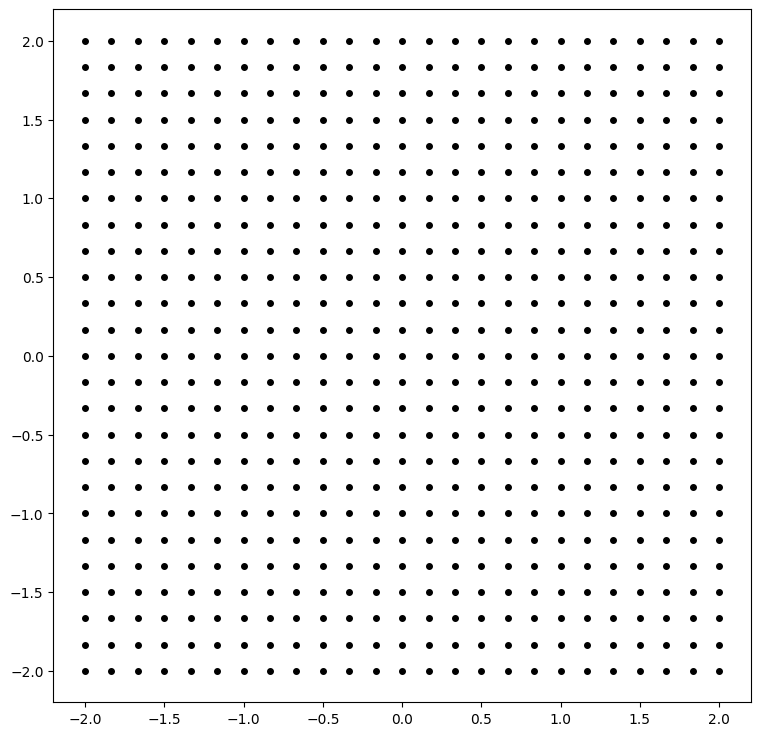

In [13]:
l = 25 # 一辺の生成画像数
# 横軸と縦軸を設定して格子点を生成
x = np.linspace(-2, 2, l)
y = np.linspace(-2, 2, l)
z_x, z_y = np.meshgrid(x, y)
fig, ax = plt.subplots(1, 1, figsize=(9, 9))
ax.plot(z_x, z_y, "o", ms=4, color="k")
fig.savefig("lattice_point.png")

NameError: name 'ArtistAnimation' is not defined

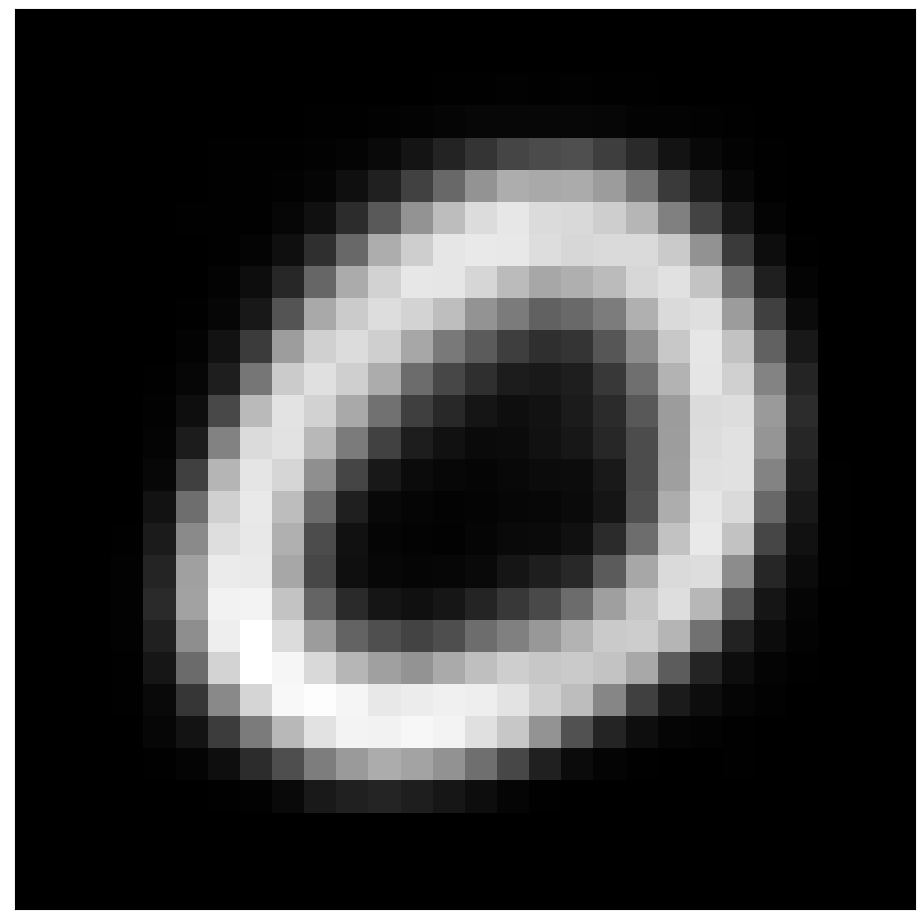

In [15]:
Z = torch.tensor(np.array([z_x, z_y]), dtype=torch.float).permute(1,2,0) # from matplotlib.animation import ArtistAnimation # gif作成のためにmatplotlibのモジュールを利用

step = 50 # 何枚の画像アニメーションに用いるか
z_dim = 2 # 潜在変数は2
# 4つの方向のスタート地点とゴール地点を座標で定義
z11 = torch.tensor([-3, 0], dtype=torch.float)
z12 = torch.tensor([3, 0], dtype=torch.float)
z21 = torch.tensor([-3, 3], dtype=torch.float)
z22 = torch.tensor([3, -3], dtype=torch.float)
z31 = torch.tensor([0, 3], dtype=torch.float)
z32 = torch.tensor([0, -3], dtype=torch.float)
z41 = torch.tensor([3, 3], dtype=torch.float)
z42 = torch.tensor([-3, -3], dtype=torch.float)
# for文を回すためにリスト化する
z1_list = [z11, z21, z31, z41]
z2_list = [z12, z22, z32, z42]
# 線形変化させた潜在変数を格納するリスト
z1_to_z2_list = []
# デコーダの出力を格納するリスト
y1_to_y2_list = []
# 潜在変数のスタート地点からゴール地点を線形的に変化させてリストに格納する
for z1, z2 in zip(z1_list, z2_list):
    z1_to_z2_list.append(torch.cat([((z1 * ((step - i) / step)) + (z2 * (i / step))) for i in range(step)]).reshape(step, z_dim))
# 各潜在変数をデコーダに入力したときの出力をリストに格納する
for z1_to_z2 in z1_to_z2_list:
    y1_to_y2_list.append(model_z_2.decoder(z1_to_z2).cpu().detach().numpy().reshape(-1, 28, 28))
# gif化を行う
for n in range(len(y1_to_y2_list)):
    fig, ax = plt.subplots(1, 1, figsize=(9,9))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.set_xticks([])
    ax.set_yticks([])
    images = []
    for i, im in enumerate(y1_to_y2_list[n]):
        images.append([ax.imshow(im, "gray")])
    animation = ArtistAnimation(fig, images, interval=100, blit=True, repeat_delay=1000)
    animation.save(f"linear_change_{n}.gif", writer="pillow")
y = model_z_2.decoder(Z).cpu().detach().numpy().reshape(-1, 28, 28) # デコーダに潜在変数を入力
fig, axes = plt.subplots(l, l, figsize=(9, 9))
# 可視化開始
for i in range(l):
    for j in range(l):
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        axes[i][j].imshow(y[l * (l - 1 - i) + j], "gray")
fig.subplots_adjust(wspace=0, hspace=0)
fig.savefig("from_lattice_point.png")